<a href="https://colab.research.google.com/github/qyanni/qyanni.github.io/blob/master/CycleGAN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Use CycleGAN

For the following demonstration we will be using the official [CycleGAN repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix).

Folliwng steps:
1.
2.
3. etc


In this demo, everything will be saved in the local Google Colab file system. Files saved here can be accessed using the *!ls* command.


Resources:
[Official Google Colab for CycleGAN](https://colab.research.google.com/github/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb#scrollTo=Pt3igws3eiVp)


In [5]:
# give it a go
!ls

pytorch-CycleGAN-and-pix2pix  sample_data


### Step 1: Clone the repository and install the required packages



In [1]:
# clone the repo
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 23.57 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [23]:
# access the downloaded repo
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [24]:
# let's see what files live in the "pytorch-CycleGAN-and-pix2pix" folder
!ls

CycleGAN.ipynb	docs		 LICENSE  pix2pix.ipynb     scripts   util
data		environment.yml  models   README.md	    test.py
datasets	imgs		 options  requirements.txt  train.py


In [29]:
# in Python, a requirements.txt file stores information about all the libraries, modules, and packages that are used for a specific project.
# we show the 10 first lines of the requirement.txt file
!head requirements.txt

torch>=1.4.0
torchvision>=0.5.0
dominate>=2.4.0
visdom>=0.1.8.8
wandb


In [ ]:
# and can simply install it using the following line
!pip install -r requirements.txt

## Step 2: Download or Create Your Dataset

*  Option 1: Download

  You can download the official datasets using the following line:
  `bash ./datasets/download_cyclegan_dataset.sh`

  The options are  `[apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

* Option 2: Create

  Alternatively, you can use your own dataset. You need to create folders and populate them with your images:
  1. in the current directory type in `%cd datasets` to access the `/datasets` folder
  1. create a dataset folder via `%mkdir my_dataset`
  2. create subfolders `testA`, `testB`, `trainA`, and `trainB` under `/my_dataset`
  3. place images you want to transform from a to b (cat2dog) in the `testA` folder
  4. place images you want to transform from b to a (dog2cat) in the `testB` folder
  5. Do the same for the `trainA` and `trainB` folders

In [ ]:
# Here I will be using the ukiyoe2photo dataset

!bash ./datasets/download_cyclegan_dataset.sh ukiyoe2photo

We have the following structure:

`datasets/ukiyoe2photo/`

* `trainA` and `testA` are pictures of Ukiyo-e and have the following filename: `01229.jpg`
*  `trainB` and `testB` are photos and have the following filename: `2015-05-28 02:38:04.jpg`

All the  images square shaped of size 256×256. Let us visualise a few examples:

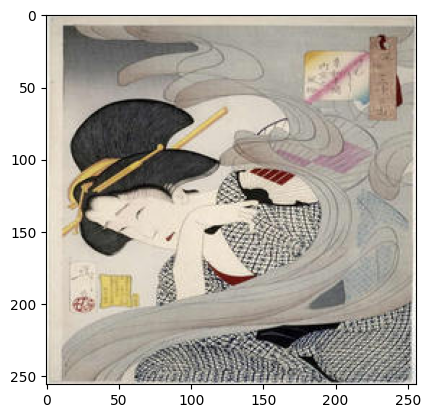

In [45]:
import matplotlib.pyplot as plt
img = plt.imread('./datasets/ukiyoe2photo/testA/01229.jpg')
plt.imshow(img)

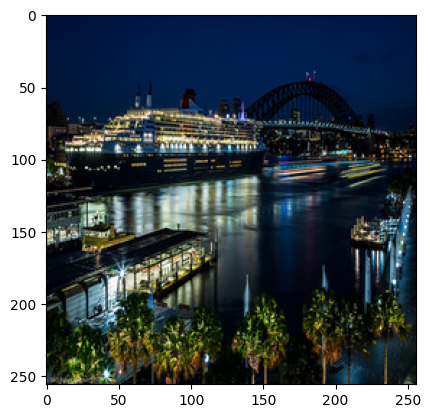

In [47]:
img = plt.imread('./datasets/ukiyoe2photo/trainB/2015-05-28 02:38:04.jpg')
plt.imshow(img)

## Step 3: Training From Scratch

You can train the model via the following line:

-   `python train.py --dataroot ./datasets/ukiyoe2photo --name ukiyoe2photo --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size.



In [50]:
!python train.py --dataroot ./datasets/ukiyoe2photo --name ukiyoe2photo --model cycle_gan --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/ukiyoe2photo       	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

In [51]:
!ls

checkpoints	docs		 models		requirements.txt  util
CycleGAN.ipynb	environment.yml  options	scripts
data		imgs		 pix2pix.ipynb	test.py
datasets	LICENSE		 README.md	train.py
